1. Create moons with the sklearn.datasets.make_moons() function.
     1. Use the code below:
     2. Remember to scale the data.
2. Cluster the data with DBSCAN.
     1. Set min_samples=30.
     2. Use the NearestNeighbors class to determine a good value for 'eps'.
     3. Create a DBSCAN model and fit it to the data.
     4. Plot the resulting clusters.
3. Cluster the data using Agglomerative Clustering.
     1. Create a dendrogram and find where the average length of the vertical lines is the longest.
     2. Create and fit an Agglomerative Clustering model on the data.
     3. Plot the resulting clusters.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

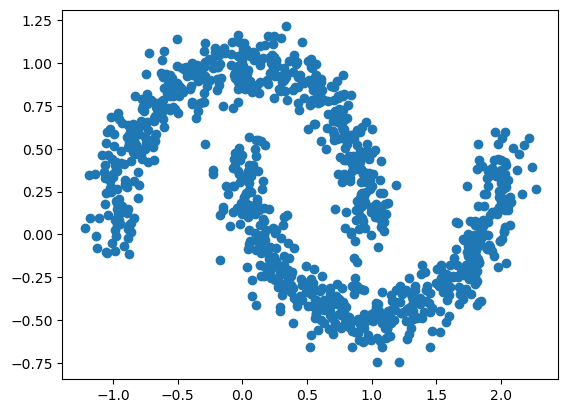

In [4]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples = 1000, noise=.1, random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])

# Scale the data 

In [6]:
moons = StandardScaler().fit_transform(moons)

# Cluster the data with DBSCAN

In [7]:
min_samples=30
n_neighbors = NearestNeighbors(n_neighbors=min_samples)
n_neighbors.fit(moons)
distances, indices= n_neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

In [8]:
sorted_distances = np.sort(distances[:, min_samples-1])
sorted_distances[:5]

array([0.14650369, 0.14797938, 0.14803976, 0.15245298, 0.15395415])

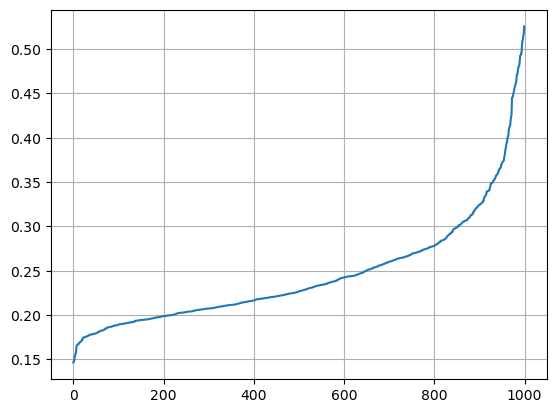

In [9]:
plt.plot(sorted_distances)
plt.grid()

The best Value of eps is 0.3

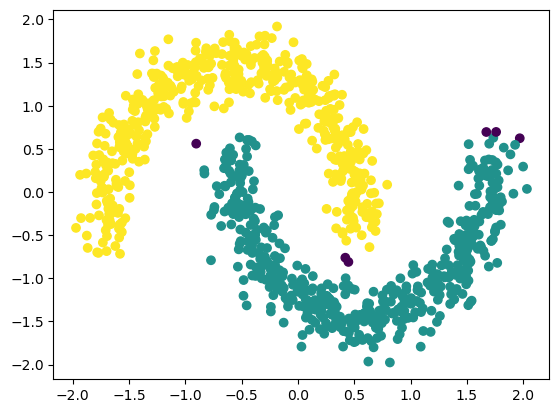

In [10]:
dbs = DBSCAN(min_samples=min_samples, eps=.3)
dbs.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_)

# Cluster the data using Agglomerative Clustering

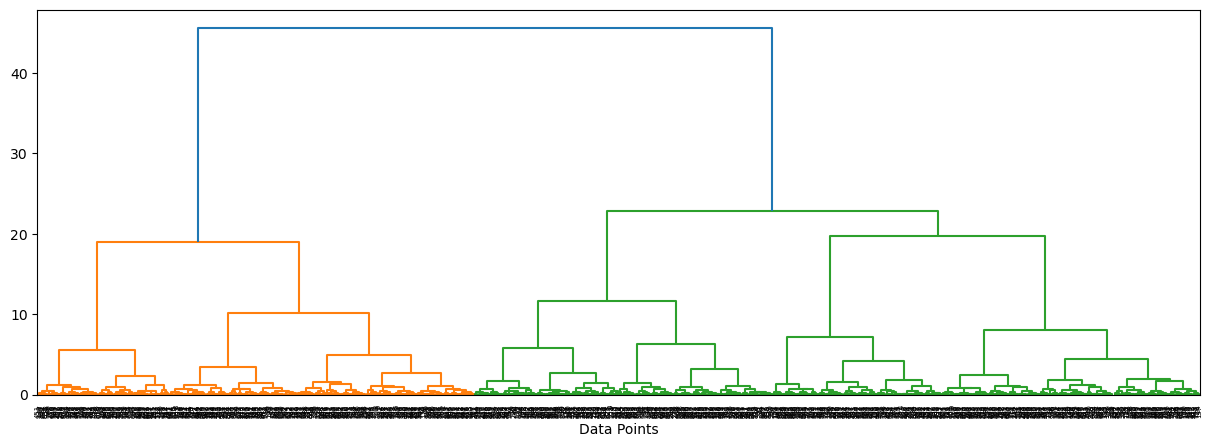

In [12]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');
    

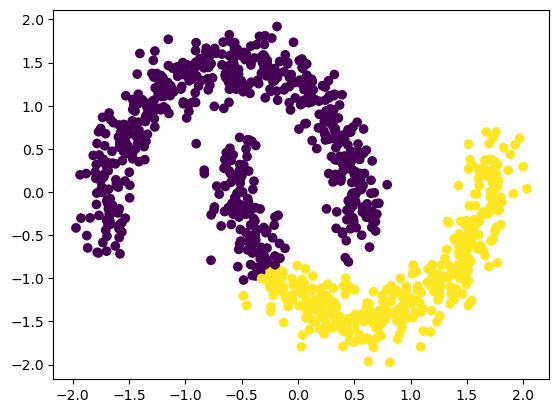

In [11]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);
     